This is a notebook of Exploratory data analysis of H1B visa for the year 2022. 

About the Dataset
This dataset provides a comprehensive record of Labor Condition Application (LCA) disclosures for H1B visa petitions filed with the U.S. Department of Labor (DOL) 2022. The H1B visa is a non-immigrant visa that allows U.S. companies to employ foreign workers in specialty occupations requiring theoretical or technical expertise. These roles typically include fields such as IT, engineering, finance, healthcare, and more. The H1B program is critical for addressing skill gaps in the U.S. workforce and supporting economic growth.

Key features
Years Covered: 2022.
Number of Records: Includes all LCAs filed during this period.
Attributes: Comprehensive fields such as case number, job title, employer name, wage data, work location, and visa classification.
Source: Data is based on public disclosures from the U.S. Department of Labor.

Source of Dataset 
https://www.kaggle.com/datasets/zongaobian/h1b-lca-disclosure-data-2020-2024/data?select=Combined_LCA_Disclosure_Data_FY2022.csv

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(pd.__version__)

2.2.3


In [4]:
print(np.__version__)

2.0.2


In [5]:
print(sns.__version__)

0.13.2


In [6]:
import matplotlib
print(matplotlib.__version__)

3.9.4


In [8]:
# Load Dataset

h1b_visa_data_2022 = pd.read_csv("data/Combined_LCA_Disclosure_Data_FY2022.csv")

In [10]:
# Data Analysis 

h1b_visa_data_2022.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-21270-606997,Certified,2021-09-26,2021-10-01,NaN,H-1B,APPLICATIONS SUPPORT ANALYST/ADMINISTRATOR,15-1132.00,"Software Developers, Applications",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-21270-606867,Certified,2021-09-26,2021-10-01,NaN,H-1B,Designer,17-3013.00,Mechanical Drafters,Y,...,No,NaN,NaN,NaN,Disclose Business and Employment,Stacey,Francyne,NaN,Stacey Law Practice,francyne@staceylawpractice.com
2,I-200-21270-606846,Certified,2021-09-26,2021-10-01,NaN,H-1B,Data Analyst,15-2031.00,Operations Research Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-21270-606842,Certified,2021-09-26,2021-10-01,NaN,H-1B,Pharmaceutical Chemist,19-2031.00,Chemists,Y,...,No,NaN,NaN,NaN,Disclose Business,JONNALAGADDA,SRINIVASA,R,"S. R. JONNALAGADDA, P.C.",Lawassociates@att.net
4,I-200-21270-606941,Certified,2021-09-26,2021-10-01,NaN,H-1B,Senior Systems Analyst JC60,15-1121.00,Computer Systems Analysts,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [11]:
# Features of the data
h1b_visa_data_2022.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS1',
       'EMPLOYER_POC_ADDRESS2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_POC

In [12]:
# Shape of the data 

h1b_visa_data_2022.shape

(626084, 96)

In [13]:
# Info of the data

h1b_visa_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626084 entries, 0 to 626083
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CASE_NUMBER                     626084 non-null  object 
 1   CASE_STATUS                     626084 non-null  object 
 2   RECEIVED_DATE                   626084 non-null  object 
 3   DECISION_DATE                   626084 non-null  object 
 4   ORIGINAL_CERT_DATE              35336 non-null   object 
 5   VISA_CLASS                      626084 non-null  object 
 6   JOB_TITLE                       626084 non-null  object 
 7   SOC_CODE                        626084 non-null  object 
 8   SOC_TITLE                       626084 non-null  object 
 9   FULL_TIME_POSITION              626084 non-null  object 
 10  BEGIN_DATE                      626084 non-null  object 
 11  END_DATE                        626084 non-null  object 
 12  TOTAL_WORKER_POS

In [14]:
# Statistical description

h1b_visa_data_2022.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,626084.000000,626084.000000,626084.000000,626084.000000,626084.000000,626084.000000,626084.000000,6.260840e+05,36052.000000,626084.000000,6.260840e+05,37918.000000,4.622800e+05,28473.000000,626084.000000,6.260840e+05,2.019660e+05,626084.000000,25185.000000,626084.000000
mean,1.733301,0.642399,0.267892,0.134202,0.008275,0.375402,0.308590,1.638834e+10,483.968379,418626.627369,1.701851e+10,675.378316,1.522904e+10,930.612229,1.731483,1.125616e+05,1.347320e+05,95695.470874,2020.953345,1.496076
std,5.252417,3.436529,1.377175,1.013764,0.134263,1.972798,1.506561,1.907554e+11,1287.218875,211290.370812,1.214348e+11,1609.521421,2.770478e+10,2253.747432,5.244737,7.298876e+04,1.076095e+05,40314.664989,1.256277,0.711287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,0.000000,1111.000000,1.023303e+09,0.000000,1.201521e+09,0.000000,1.000000,7.250000e+00,1.100000e+01,7.250000,1990.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312396e+10,0.000000,334111.000000,1.312396e+10,0.000000,1.310735e+10,27.000000,1.000000,8.164000e+04,9.740000e+04,75338.000000,2021.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.510642e+10,0.000000,541330.000000,1.512813e+10,0.000000,1.419321e+10,110.000000,1.000000,1.050000e+05,1.258000e+05,94037.000000,2021.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.732509e+10,200.000000,541511.000000,1.732238e+10,307.000000,1.703497e+10,230.000000,1.000000,1.400000e+05,1.633960e+05,119350.000000,2022.000000,2.000000
max,150.000000,100.000000,150.000000,50.000000,30.000000,100.000000,50.000000,9.721848e+13,9639.000000,928120.000000,5.071413e+13,9621.000000,9.773127e+12,9866.000000,150.000000,1.950000e+07,1.701980e+07,810850.000000,2022.000000,10.000000


In [15]:
# Data cleaning

h1b_visa_data_2022.isnull().sum()

CASE_NUMBER                     0
CASE_STATUS                     0
RECEIVED_DATE                   0
DECISION_DATE                   0
ORIGINAL_CERT_DATE         590748
                            ...  
PREPARER_LAST_NAME         303675
PREPARER_FIRST_NAME        303483
PREPARER_MIDDLE_INITIAL    513820
PREPARER_BUSINESS_NAME     295978
PREPARER_EMAIL             299005
Length: 96, dtype: int64

In [16]:
# Handling missing values

h1b_visa_data_2022.fillna(h1b_visa_data_2022.median(numeric_only=True),inplace=True)

In [17]:
column_list = h1b_visa_data_2022.columns.tolist()

for column_list in column_list:
    print(column_list,h1b_visa_data_2022[column_list].isnull().sum())
   

CASE_NUMBER 0
CASE_STATUS 0
RECEIVED_DATE 0
DECISION_DATE 0
ORIGINAL_CERT_DATE 590748
VISA_CLASS 0
JOB_TITLE 0
SOC_CODE 0
SOC_TITLE 0
FULL_TIME_POSITION 0
BEGIN_DATE 0
END_DATE 0
TOTAL_WORKER_POSITIONS 0
NEW_EMPLOYMENT 0
CONTINUED_EMPLOYMENT 0
CHANGE_PREVIOUS_EMPLOYMENT 0
NEW_CONCURRENT_EMPLOYMENT 0
CHANGE_EMPLOYER 0
AMENDED_PETITION 0
EMPLOYER_NAME 0
TRADE_NAME_DBA 567910
EMPLOYER_ADDRESS1 0
EMPLOYER_ADDRESS2 341169
EMPLOYER_CITY 0
EMPLOYER_STATE 98
EMPLOYER_POSTAL_CODE 0
EMPLOYER_COUNTRY 0
EMPLOYER_PROVINCE 587394
EMPLOYER_PHONE 0
EMPLOYER_PHONE_EXT 0
NAICS_CODE 0
EMPLOYER_POC_LAST_NAME 1
EMPLOYER_POC_FIRST_NAME 3
EMPLOYER_POC_MIDDLE_NAME 510221
EMPLOYER_POC_JOB_TITLE 0
EMPLOYER_POC_ADDRESS1 0
EMPLOYER_POC_ADDRESS2 332873
EMPLOYER_POC_CITY 0
EMPLOYER_POC_STATE 652
EMPLOYER_POC_POSTAL_CODE 7
EMPLOYER_POC_COUNTRY 0
EMPLOYER_POC_PROVINCE 625326
EMPLOYER_POC_PHONE 0
EMPLOYER_POC_PHONE_EXT 0
EMPLOYER_POC_EMAIL 14008
AGENT_REPRESENTING_EMPLOYER 0
AGENT_ATTORNEY_LAST_NAME 163804
AGENT_ATTOR

In [19]:
# Dropping null rows

h1b_visa_data_2022 = h1b_visa_data_2022.dropna(subset=["EMPLOYER_STATE"])

In [20]:
# Checking for duplicates 

h1b_visa_data_2022.duplicated().sum()

np.int64(0)

In [21]:
# Removing duplicate entry 

h1b_visa_data_2022.drop_duplicates(inplace=True)

In [22]:
# Verifying the removal of duplicates

h1b_visa_data_2022.duplicated().sum()

np.int64(0)

In [24]:
# Checking the unique values of case status

h1b_visa_data_2022['CASE_STATUS'].unique()

array(['Certified', 'Certified - Withdrawn', 'Denied', 'Withdrawn'],
      dtype=object)

In [26]:
# Counting the values of each case status

h1b_visa_data_2022['CASE_STATUS'].value_counts()

CASE_STATUS
Certified                576139
Certified - Withdrawn     35331
Withdrawn                 11420
Denied                     3096
Name: count, dtype: int64

In 2022, there were 576139 certified applicant which means 92.03% of the total applicant were approved. Similarly, 32,331 were approved initially, but the employer later decided to withdraw it. 11,420 withdrawn their application whereas only 3096(0.49%) were denied. 

In [27]:
# Filtered dataset for certified case only 

h1b_visa_data_2022_certified = h1b_visa_data_2022[h1b_visa_data_2022['CASE_STATUS']=='Certified']

In [28]:
# Distribution of job title on certified case 

h1b_visa_data_2022_certified['JOB_TITLE'].value_counts().head(60)

JOB_TITLE
Software Engineer                                     29807
Software Developer                                    17251
Senior Software Engineer                               7991
SOFTWARE DEVELOPER                                     6854
Manager JC50                                           5296
SOFTWARE ENGINEER                                      4912
Assistant Professor                                    3887
Architect                                              3216
Senior Systems Analyst JC60                            3063
Associate                                              2808
Software Development Engineer II                       2618
Analyst                                                2609
Data Scientist                                         2390
Data Engineer                                          2377
Software Development Engineer I                        2228
Software Engineer                                      2112
Manager                       

In [29]:
h1b_visa_data_2022_certified['JOB_TITLE'].value_counts().tail(60)

JOB_TITLE
Tech Lead, Map Production                                     1
Sensor Hardware Engineer                                      1
Computer Systems Analysts - KBGFJG105960-4                    1
Senior DevSecOps Engineer (Development Platforms)             1
SENIOR MANAGER - TECHNOLOGY OPERATIONS                        1
SHAREPOINT NINTEX DEVELOPER                                   1
Orthotic/Prosthetic Resident                                  1
Research Scientist, Assay Development                         1
Manager, Network Operations                                   1
Database Analyst Sr                                           1
Telemedicine Operations Coordinator                           1
Sr. R&D Specialist                                            1
Associate BI Analyst                                          1
Software Engineer 1615.62982                                  1
Sr. Associate IS Engineer 20516.3228                          1
Manager, Analytics and Reporti

In [30]:
# Assuming `h1b_visa_data_2022_certified` is a DataFrame
job_title_counts = h1b_visa_data_2022_certified['JOB_TITLE'].value_counts()


# Save the output to a text file
with open('job_title_counts_2022.txt', 'w') as f:
    f.write(job_title_counts.to_string())

In [31]:
# Distribution plot of top 10 Job Status
top_jobs = h1b_visa_data_2022_certified["JOB_TITLE"].value_counts().head(10)

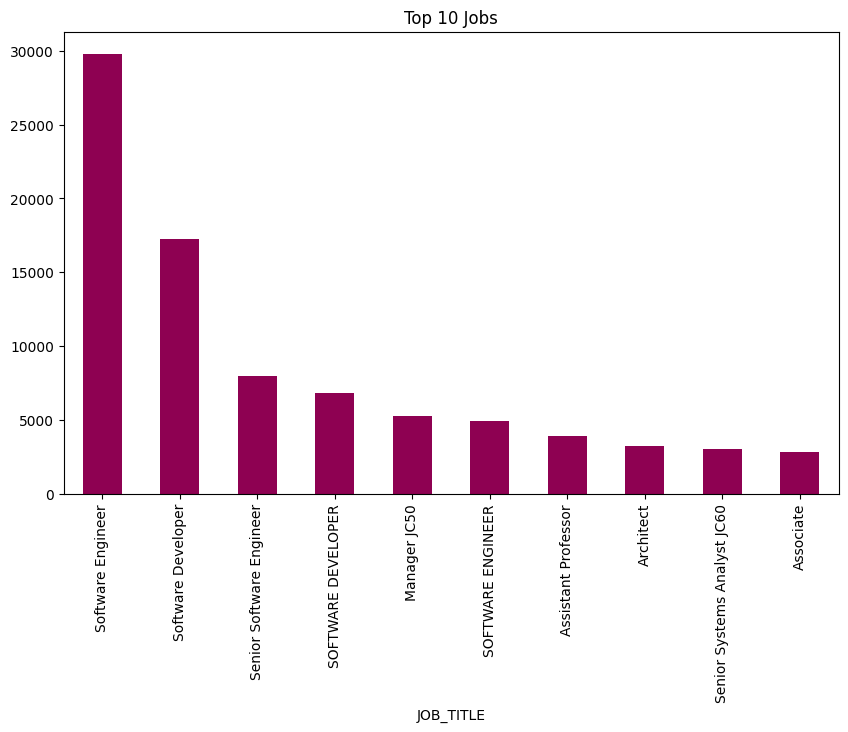

In [32]:
# plot bar graph
top_jobs.plot(kind="bar",title="Top 10 Jobs",figsize=(10,6),colormap='PiYG')
plt.show()

From the above data, mostly the IT professionals are highly certified such as Software Engineer, Software Developer, and Senior Software Engineer.


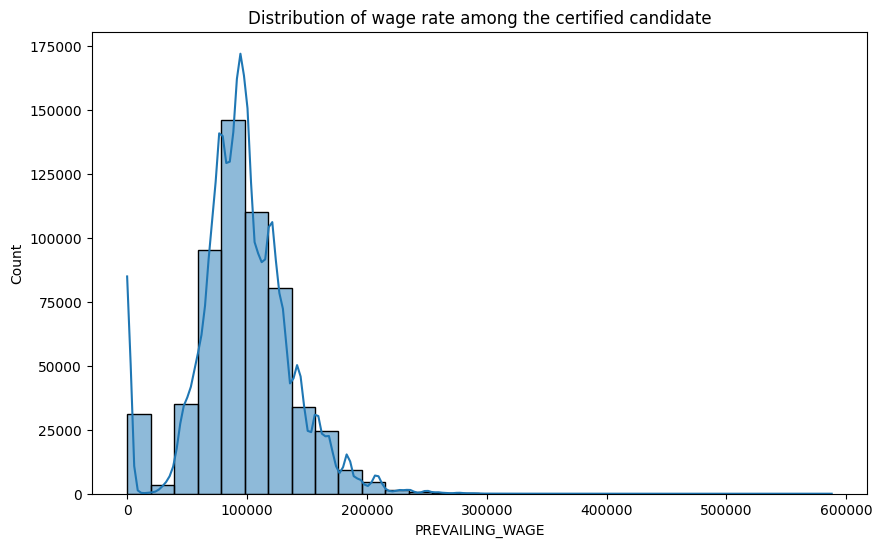

In [33]:
# Distribution of Prevailing wage with Histogram plot

plt.figure(figsize=(10,6))
sns.histplot(h1b_visa_data_2022_certified["PREVAILING_WAGE"],bins=30,kde=True)
plt.title("Distribution of wage rate among the certified candidate")
plt.show()



The histogram displays the distribution of prevailing wages for H1B visa applications in 2022. Most certified candidates earn wages clustered around the lower to mid-range, with a peak around $100,000, and the frequency decreases as wages increase beyond this range.

In [34]:
# Distribution of worksite states

top_worksite_state = h1b_visa_data_2022_certified["WORKSITE_STATE"].value_counts().head(10)


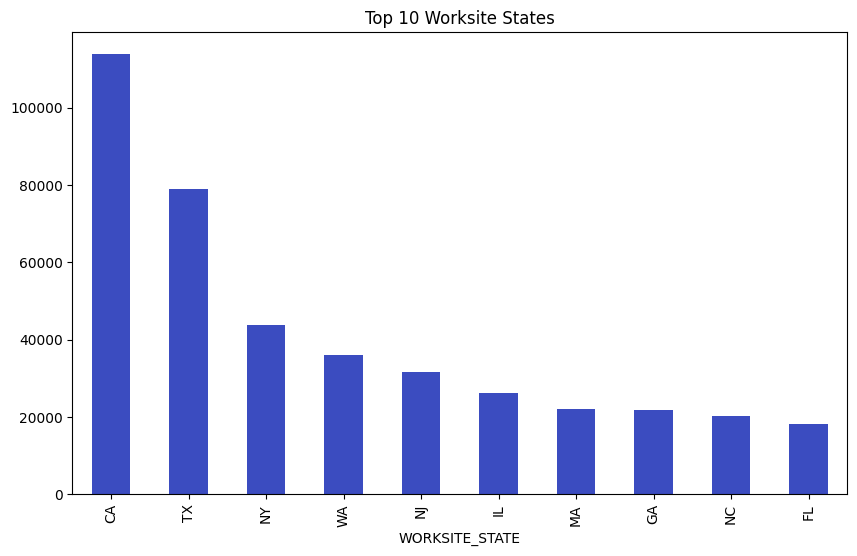

In [35]:
# plot bar graph for worksite states

top_worksite_state.plot(kind="bar",title="Top 10 Worksite States",figsize=(10,6),colormap='coolwarm')
plt.show()

The bar plot shows the top 10 states with the highest number of certified H-1B visa applications in 2022. California has the highest number of certified H-1B applications, followed by Texas and New York. The remaining states including, Washington, New Jersey, Illinois, Massachusetts, Georgia, North Carolina, and Florida have a progressively decreasing number of applications.

In [36]:
# Average wage by states

average_wage_by_state = h1b_visa_data_2022_certified.groupby("WORKSITE_STATE")["WAGE_RATE_OF_PAY_FROM"].mean().sort_values(ascending=False)
print(average_wage_by_state)

WORKSITE_STATE
WV    146219.662320
WA    139891.001664
CA    139332.700448
ME    128729.568130
NY    125576.467108
MS    114285.805152
DE    112271.790698
MA    110381.036645
DC    108057.071258
OR    107007.622603
NJ    106903.547730
NV    105066.490388
TX    104486.128146
CO    104317.748656
VA    103985.145448
CT    102547.404412
IL    102118.578916
NC    102014.198775
HI    101923.524710
PA    101666.039965
MD    101137.832449
GA    101104.710880
ID    101085.274079
AZ    100284.799734
NH     99369.951717
RI     99267.435987
AR     99216.756011
LA     97065.634700
AL     96797.439525
MN     96589.673676
FL     96522.091606
WI     96223.151279
MO     96186.302414
KS     95841.816384
KY     94503.933170
OH     94385.420186
IA     94195.694267
TN     93265.039787
UT     91296.133347
NE     91288.999608
SC     90356.582171
SD     89953.303610
OK     89890.096676
MI     89607.260055
IN     88980.798943
MT     87292.860721
NM     86955.838328
VT     84580.044816
AK     82529.913542
WY   

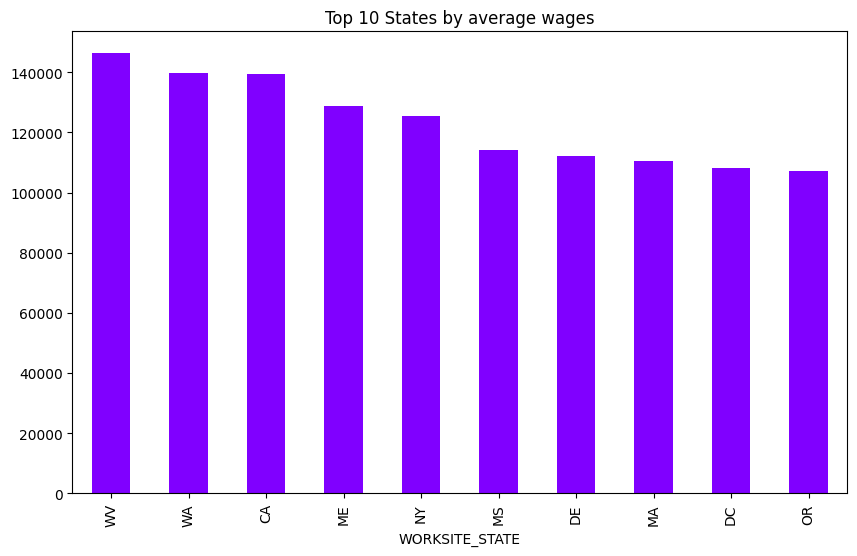

In [37]:
# plot bar graph of top 10 average wage by state 
average_wage_by_state.head(10).plot(kind="bar",title="Top 10 States by average wages",figsize=(10,6),colormap='rainbow')
plt.show()

The bar chart presents the top 10 states with the highest average wages for H1B visa applications in 2021. West Virginia leads with the highest average wage, followed by Washington and California. The remaining states, including Maine, New York, Mississippi, Delaware, Massachusetts, District of Columbia, and Oregon show a gradual decrease in average wages.

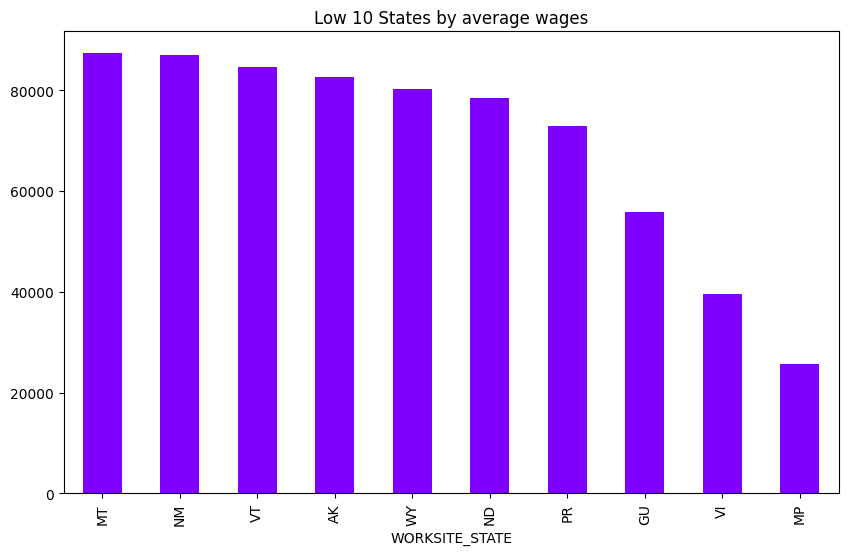

In [38]:
# plot bar graph of low 10 average wage by state 
average_wage_by_state.tail(10).plot(kind="bar",title="Low 10 States by average wages",figsize=(10,6),colormap='rainbow')
plt.show()

The bar chart presents the bottom 10 states with the lowest average wages for H1B visa applications in 2022. Montana has the lowest average wage, followed by New Mexico and Vermont. The remaining states, including Alaska, Wyoming, North Dakota, Puerto Rico, Guam, Virgin Islands, and Northern Mariana Islands, show a gradual increase in average wages.

In [39]:
# Distribution plot of top 10 SOC_TITLE
top_soc_title = h1b_visa_data_2022_certified["SOC_TITLE"].value_counts().head(10)
print(top_soc_title)

SOC_TITLE
Software Developers, Applications                   156075
Software Developers                                  34168
Computer Systems Analysts                            32424
Software Developers, Systems Software                31082
Computer Systems Engineers/Architects                21457
Information Technology Project Managers              15056
Computer and Information Systems Managers            14486
Business Intelligence Analysts                       12719
Software Quality Assurance Engineers and Testers     11620
Operations Research Analysts                         10783
Name: count, dtype: int64


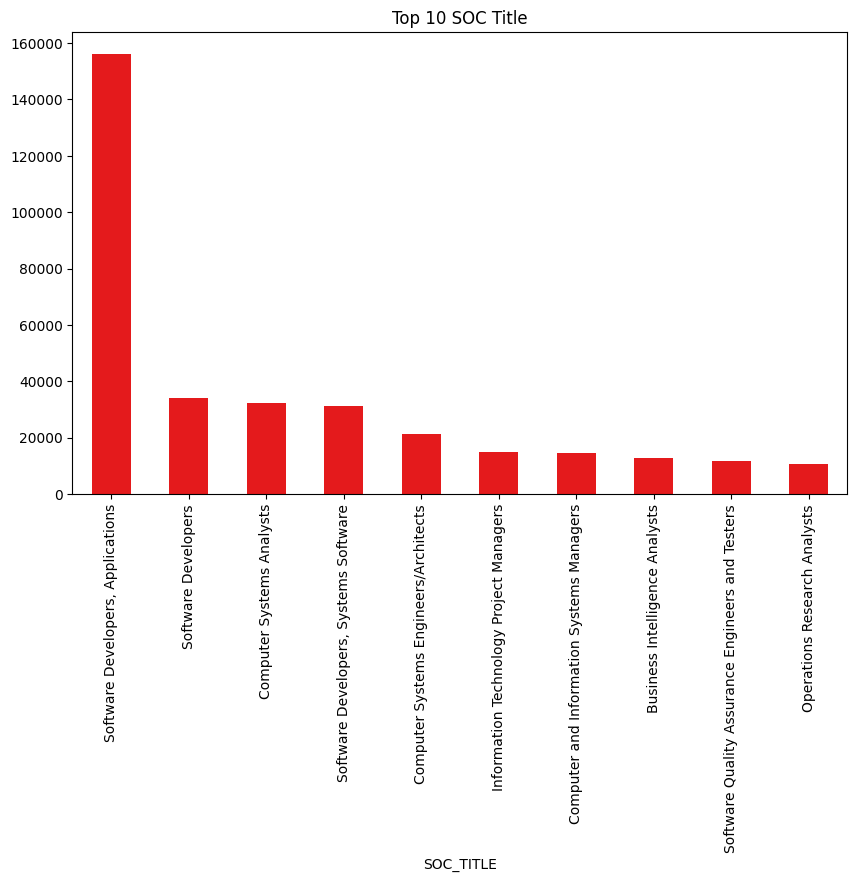

In [40]:
# Bar plot of top 10 soc_title
top_soc_title.plot(kind="bar",title="Top 10 SOC Title",figsize=(10,6),colormap="Set1")
plt.show()

In [41]:
# Distribution plot of bottom 10 SOC_TITLE
bottom_soc_title = h1b_visa_data_2022_certified["SOC_TITLE"].value_counts().tail(10)
print(bottom_soc_title)

SOC_TITLE
Mutimedia Artists and Animators            1
Cost Estimator                             1
Automotive Engineering Technicians         1
PETROLEUM ENGINEERS                        1
ELECTRONICS ENGINEERS, EXCEPT COMPUTERS    1
COMPUTER USER SUPPORT SPECIALISTS          1
Automotive Specialty Technicians           1
Psychiatrist                               1
SOFTWARE DEVELOPER, APPLICATIONS           1
Receptionists and Information Clerks       1
Name: count, dtype: int64


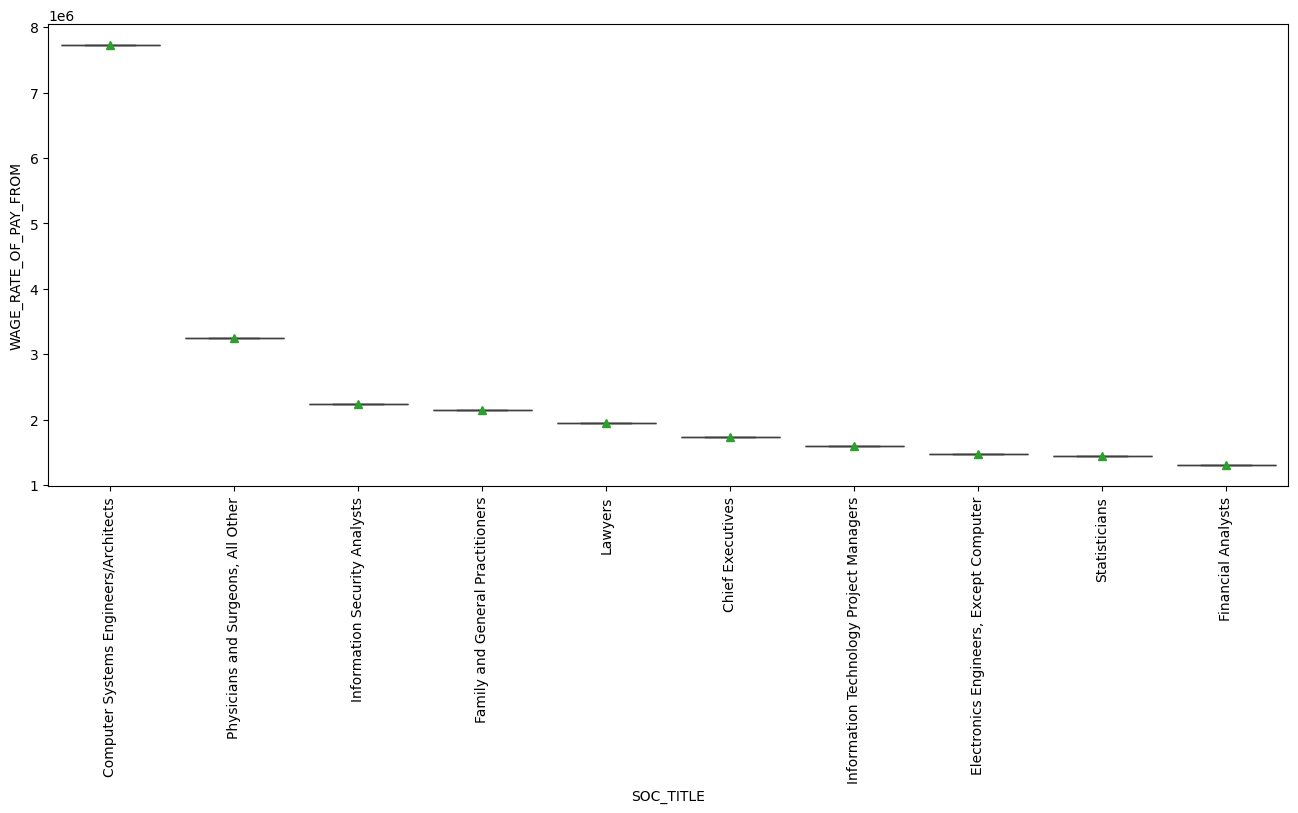

In [43]:
# Wages by Job title

plt.figure(figsize=(16,6))
sns.boxplot(data=h1b_visa_data_2022_certified[["SOC_TITLE",
                                               "WAGE_RATE_OF_PAY_FROM"]].sort_values(by="WAGE_RATE_OF_PAY_FROM",
                                                                                     ascending=False).head(10),x="SOC_TITLE",
                                                                                     y="WAGE_RATE_OF_PAY_FROM",showmeans=True)
plt.xticks(rotation=90)
plt.show()


In [44]:
# Top employers getting H1B visa certified

top_employers = h1b_visa_data_2022_certified["EMPLOYER_NAME"].value_counts().head(20)
print(top_employers)

EMPLOYER_NAME
Amazon.com Services LLC                   13674
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    13421
Google LLC                                11572
Microsoft Corporation                     11547
Ernst & Young U.S. LLP                     9428
INFOSYS LIMITED                            7670
TATA CONSULTANCY SERVICES LIMITED          5957
Tata Consultancy Services Limited          5169
Apple Inc.                                 4914
Intel Corporation                          4818
Amazon Web Services, Inc.                  4023
CAPGEMINI AMERICA INC                      3731
Meta Platforms, Inc.                       3716
Deloitte Consulting LLP                    3469
WAL-MART ASSOCIATES, INC.                  3293
Accenture LLP                              2985
Qualcomm Technologies, Inc.                2613
WIPRO LIMITED                              2431
JPMORGAN CHASE & CO.                       2229
COMPUNNEL SOFTWARE GROUP, INC              2204
Name: count, dtype: int64


In [45]:
# Bottom employers getting H1B visa certified

bottom_employers = h1b_visa_data_2022_certified["EMPLOYER_NAME"].value_counts().tail(10)
print(bottom_employers)

EMPLOYER_NAME
Unipres Southeast USA Inc.                      1
Wagner Millwork LLC                             1
Decipher Software Solutions LLC.                1
Mighty Group, Inc.                              1
Project World Impact, LLC                       1
FASTRAXPOS LLC                                  1
Pennsylvania Turnpike Commission                1
Mars Hill University                            1
Sweat Holdings, Inc.                            1
BOEHRINGER INGELHEIM ANIMAL HEALTH USA, INC.    1
Name: count, dtype: int64


In [46]:
employer = h1b_visa_data_2022_certified["EMPLOYER_NAME"].value_counts()

# Save the output to a text file
with open('employer-2022.txt', 'w') as f:
    f.write(employer.to_string())

In [48]:
# Agents representing employers 

agents = h1b_visa_data_2022_certified["AGENT_REPRESENTING_EMPLOYER"].value_counts().head(10)
print(agents)

AGENT_REPRESENTING_EMPLOYER
Yes    429391
No     146748
Name: count, dtype: int64


In [49]:
# Remote work trends

h1b_visa_data_2022_certified["RECEIVED_DATE"] = pd.to_datetime(h1b_visa_data_2022_certified["RECEIVED_DATE"], errors='coerce')
h1b_visa_data_2022_certified['YEAR'] = h1b_visa_data_2022_certified["RECEIVED_DATE"].dt.year

remote_trends = h1b_visa_data_2022_certified[h1b_visa_data_2022_certified["WORKSITE_STATE"]!=h1b_visa_data_2022_certified["EMPLOYER_STATE"]]
remote_trends_by_year = remote_trends.groupby('YEAR')['CASE_NUMBER'].count()

print(remote_trends_by_year)


YEAR
2021     61217
2022    225003
Name: CASE_NUMBER, dtype: int64


The data shows a sharp increase in H1B-certified remote work positions, rising from 61,217 in 2021 to 225,003 in 2022. This surge likely reflects post-pandemic shifts toward remote work policies, expanded employer flexibility, and evolving USCIS guidelines accommodating distributed workforces in specialized roles.